In [416]:
import numpy as np
import matplotlib.pyplot as plt

In [516]:
class Model:
    def __init__(self, v_max=None):
        self.v_0 = np.random.uniform(20, 80)
        self.x_0 = np.random.uniform(10, 150)
        self.dt_yellow = np.random.uniform(2, 5)
        self.ds = np.random.uniform(5, 20)
        self.a_p = np.random.uniform(1, 3)
        self.a_n = -1*np.random.uniform(1, 3)
        self.v_max = v_max
        self.mixed = False
        
    def set_params(self, v_0, x_0, dt_yellow, ds, a_p, a_n):
        self.v_0 = v_0
        self.x_0 = x_0
        self.dt_yellow = dt_yellow
        self.ds = ds
        self.a_p = a_p
        self.a_n = a_n

    def check_run_through(self):
        x = self.x_0 + self.ds
        t = (-self.v_0 + np.sqrt(self.v_0**2 + 2*self.a_p*x))/self.a_p
        v = self.v_0 + self.a_p*t
        if self.v_max and v > self.v_max:
            self.mixed = True
            t_a = (self.v_max - self.v_0)/self.a_p
            x_a = self.v_0*t_a + (self.a_n*(t_a**2))/2
            t_v = (x - x_a)/self.v_max
            t = t_a + t_v
            self.t_a = t_a
            self.t_v = t_v
        if t < self.dt_yellow:
            return True
        else:
            return False
            
    def check_stopping(self):
        x = self.v_0*self.dt_yellow + (self.a_n*(self.dt_yellow**2))/2
        if x < self.x_0:
            return True
        else: 
            return False
    
    def plot_distance_time(self):
        a = self.a_p if self.check_run_through() else self.a_n if self.check_stopping() else 0
        if a == 0:
            return None
        else:
            if not self.mixed:
                time = np.linspace(0, self.dt_yellow + 1, 1000)
                distance_travelled = self.v_0*time + (a*(time**2))/2
                plt.plot(time, distance_travelled)
            else:
                t_1 = np.linspace(0, self.t_a, 1000)
                d_1 = self.v_0*t_1 + (a*(t_1**2))/2
                t_2 = np.linspace(self.t_a, self.t_a + self.t_v, 1000)
                d_2 = self.v_max*t_2
                plt.plot(t_1, d_1)
                plt.plot(t_2, d_2)
            plt.axhline(self.x_0 + self.ds, ls='--', color='purple', label='distance to pass before red')
            plt.axhline(self.x_0, ls='--', color='brown', label='distance to stop at before red')
            plt.axvline(self.dt_yellow, ls='-.', color='red', label='time before red')
            plt.title('Distance vs Time')
            plt.xlabel("Time")
            plt.ylabel("Distance")
            plt.legend()
            plt.show()
        
    def plot_speed_distance(self):
        a = self.a_p if self.check_run_through() else self.a_n if self.check_stopping() else 0
        if a == 0:
            return None
        else:
            if not self.mixed:
                time = np.linspace(0, self.dt_yellow + 1, 1000)
                v = self.v_0 + a*time
                distance_travelled = self.v_0*time + (a*(time**2))/2
                plt.plot(v, distance_travelled)
            else:
                t_1 = np.linspace(0, self.t_a, 1000)
                v_1 = self.v_0 + a*t_1
                d_1 = self.v_0*t_1 + (a*(t_1**2))/2
                t_2 = np.linspace(self.t_a, self.t_a + self.t_v, 1000)
                v_2 = np.full((1000,), self.v_max)
                d_2 = self.v_max*t_2
                plt.plot(v_1, d_1, ls='-')
                plt.plot(v_2, d_2, ls='-')
                
            plt.axhline(self.x_0 + self.ds, ls='--', color='purple', label='distance to pass before red')
            if self.check_stopping() and not self.check_run_through():
                plt.xlim(max(v)+0.8, min(v)-0.8)
            plt.axhline(self.x_0, ls='--', color='brown', label='distance to stop at before red')
            plt.title('Speed vs Distance')
            plt.xlabel("Velocity")
            plt.ylabel("Distance")
            plt.legend()
            plt.show()

# Case 1

In this case we see that the model decides that car should stop. In the graph we see that, when car starts stopping, it manages to stop before reaching the intersection (brown line) before the light turns red (red line).

In [542]:
m = Model()
m.set_params(24.42533380562775,
             76.24617020571269,
             2.498973276444266,
             9.072161729019687,
             2.985411146821483,
             -1.7985381511101186)

In [543]:
m.check_run_through(), m.check_stopping()

(False, True)

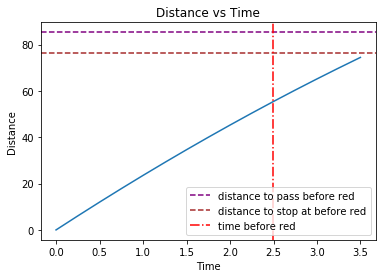

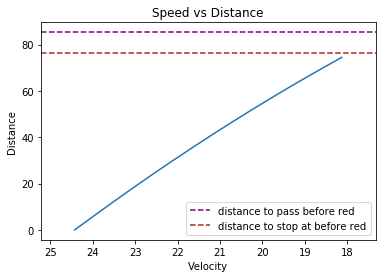

(None, None)

In [544]:
m.plot_distance_time(), m.plot_speed_distance()

# Case 2

Let's notice that in this case only the initial velocity is changed (increased by 10). Because of this change the decision of the model is changed, so that the care runs through. In the graph we see that, when the car moves with acceleration it manages to pass the intersection of the roads (purple line) before the light turns red (red line).

In [549]:
m = Model()
m.set_params(34.42533380562775,
             76.24617020571269,
             2.498973276444266,
             9.072161729019687,
             2.985411146821483,
             -1.7985381511101186)

In [550]:
m.check_run_through(), m.check_stopping()

(True, False)

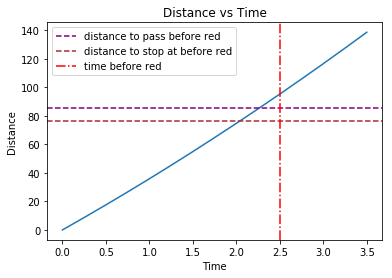

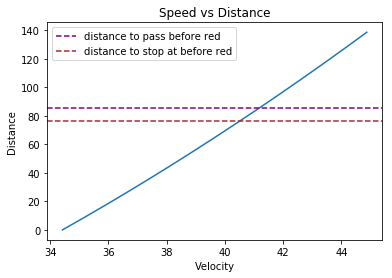

(None, None)

In [551]:
m.plot_distance_time(), m.plot_speed_distance()

# Case 3

In this special case, the model shows that the car can either stop or move forward, because it will manage to do either. Let's choose moving forward in those cases (it is depicted in the graphs).

In [558]:
m = Model()
m.set_params(27.9893167796294,
             120.03202830855273,
             4.578591225544436,
             17.15724700726576,
             2.9403393482934614,
             -1.0512758733845817)

In [559]:
m.check_run_through(), m.check_stopping()

(True, True)

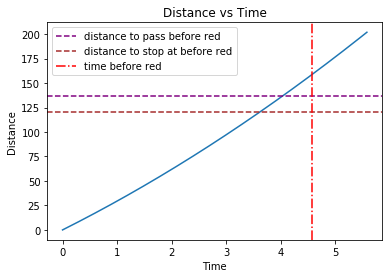

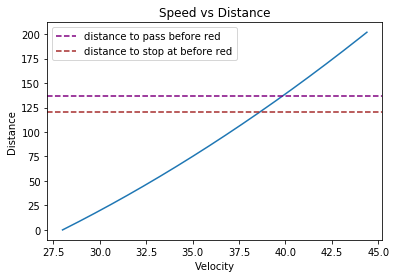

(None, None)

In [560]:
m.plot_distance_time(), m.plot_speed_distance()

# Case 4

In this case we have maximum velocity. So, whenever the car reaches the maximum velocity, it does not accelerate anymore and moves with constant velocity. We can see this behavior in the piecewise graphs. The blue parts show the accelerating movement, the yellow parts show the movement with constant velocity.

In [537]:
m = Model(v_max=55)
m.set_params(53.904320999700246,
            129.62239807635422,
            3.3023690068765186,
            10.980802249226764,
            2.056140588125153,
            -2.1585387929729816)

In [538]:
m.check_run_through(), m.check_stopping()

(True, False)

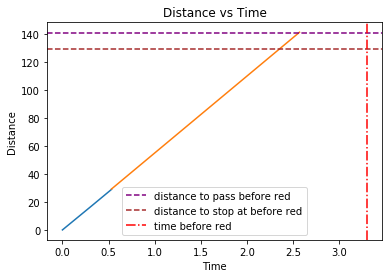

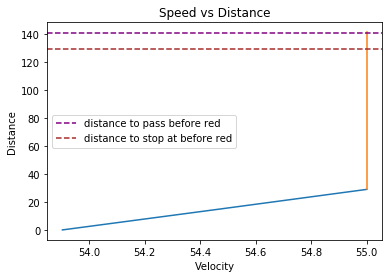

(None, None)

In [539]:
m.plot_distance_time(), m.plot_speed_distance()

# Two cars

In [732]:
class SecondCarModel(Model):
    def __init__(self, first_car, v_max=None):
        self.d = np.random.uniform(10, 100)
        Model.__init__(self, v_max)
        self.dt_yellow = first_car.dt_yellow
        self.x_0 = first_car.x_0 + self.d
        self.ds = first_car.ds
        self.first_car = first_car
    
    def collision_time(self):
        D = (self.v_0 - self.first_car.v_0)**2 + 2*(self.a_p - self.first_car.a_p)*self.d
        t_0 = (-self.v_0 + self.first_car.v_0 - np.sqrt(D))/(self.a_p - self.first_car.a_p)
        t_1 = (-self.v_0 + self.first_car.v_0 + np.sqrt(D))/(self.a_p - self.first_car.a_p)
        return max(0, max(t_0, t_1))
        
    def check_run_through(self):
        # If the first car stops this one cannot move forward 
        if self.first_car.check_stopping():
            return False
        elif self.collision_time() < self.dt_yellow:
            return False
        else:
            return Model.check_run_through(self)
    
            
    def check_stopping(self):
        if self.first_car.check_stopping():
            return True
        else:
            return Model.check_stopping(self)       
    

In [749]:
m1 = Model()
m2 = SecondCarModel(m1)

# Suggestions for both cars
print(f"Car 1 accelerate: {m1.check_run_through()},\
      Car 1 stop: {m1.check_stopping()},\
      Car 2 accelerate: {m2.check_run_through()},\
      Car 2 stop: {m2.check_stopping()}")

Car 1 accelerate: True,      Car 1 stop: False,      Car 2 accelerate: True,      Car 2 stop: False
